**1 — Importing of Essential Libraries**

In [30]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,r2_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import pickle

**2 — Importing of the Data Set**<br>
We import the data set through a python library pandas.The Dependent variable consists of cell status(M or B) and Independent variable consists of 30 features.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cystanford/breast_cancer_data/master/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.drop('id',1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.shape

(569, 31)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
for i in df.columns:
  print(df[i].value_counts())
  print("--"*50)

B    357
M    212
Name: diagnosis, dtype: int64
----------------------------------------------------------------------------------------------------
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64
----------------------------------------------------------------------------------------------------
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64
----------------------------------------------------------------------------------------------------
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64
----------------------------------------------------------------------------------------------------
512.2     3
1075.0    2
582.7     2

In [10]:
vis = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

**EDA**

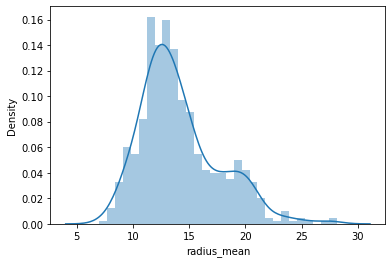

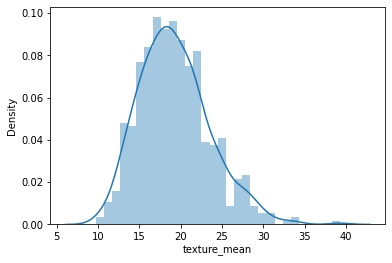

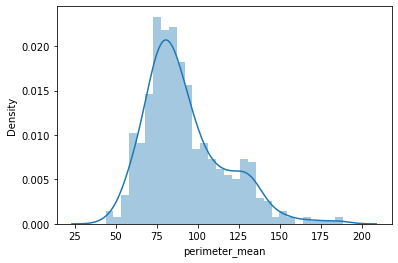

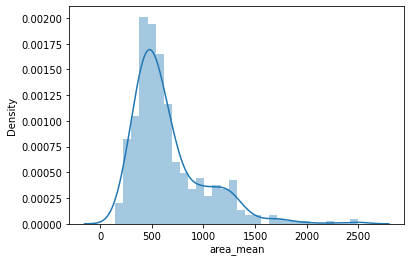

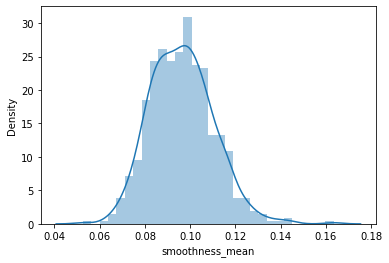

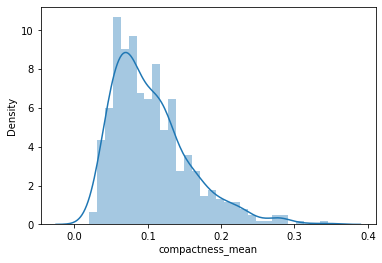

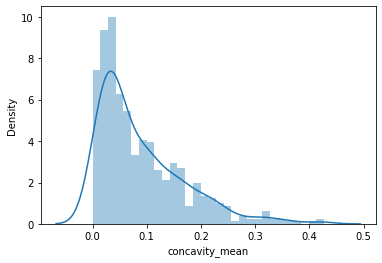

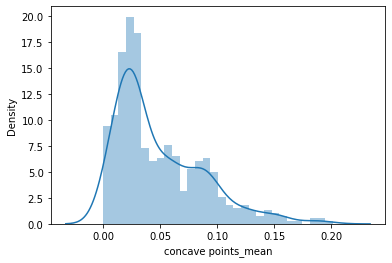

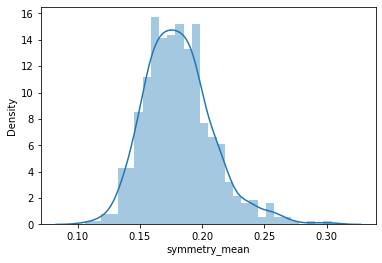

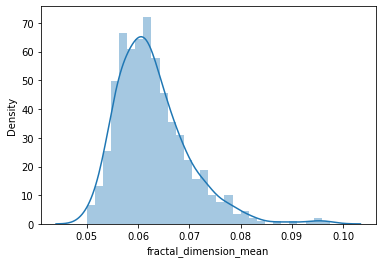

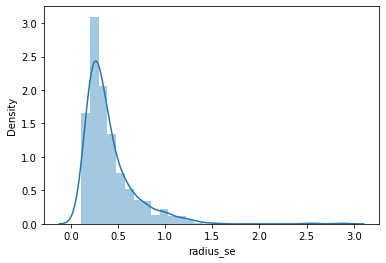

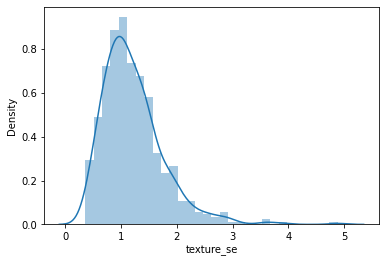

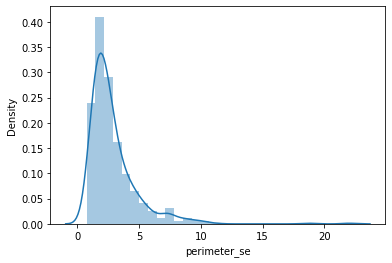

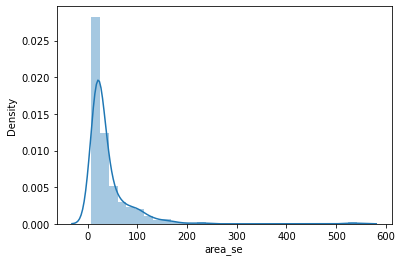

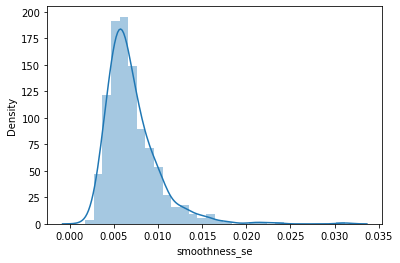

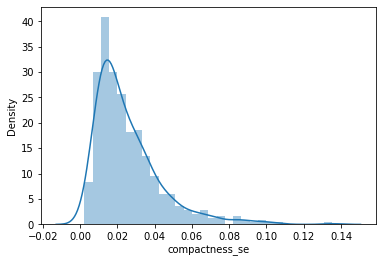

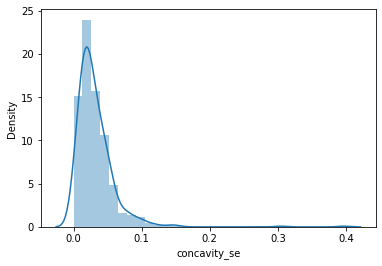

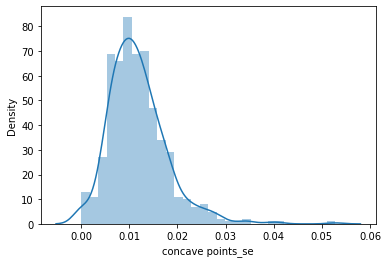

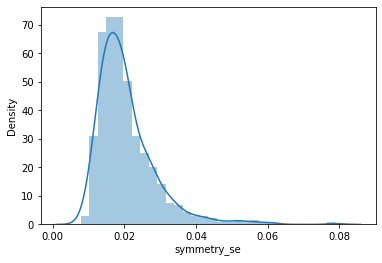

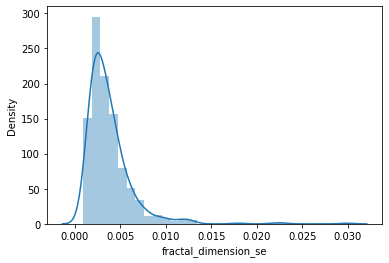

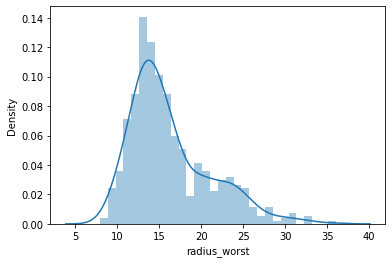

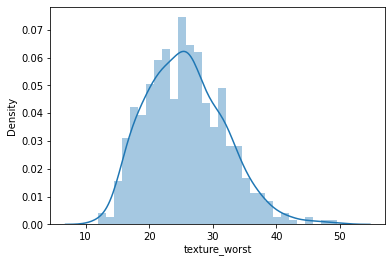

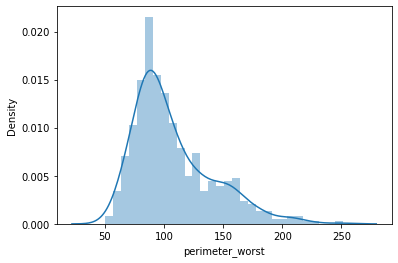

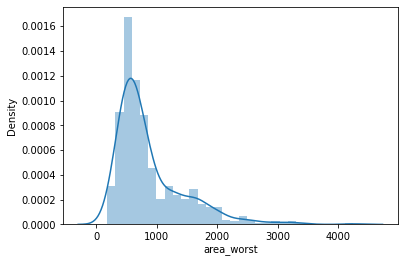

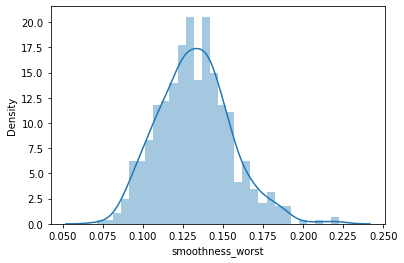

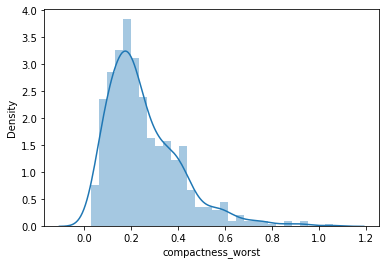

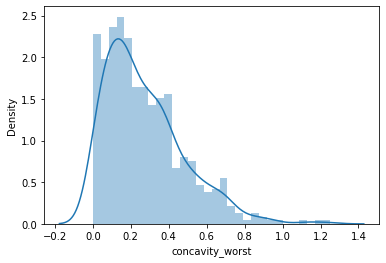

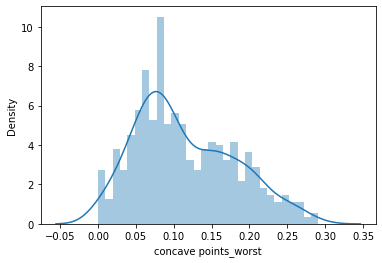

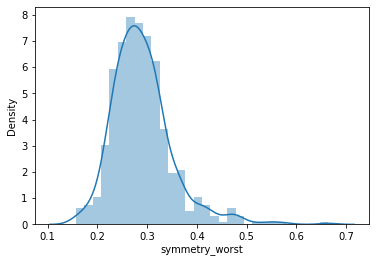

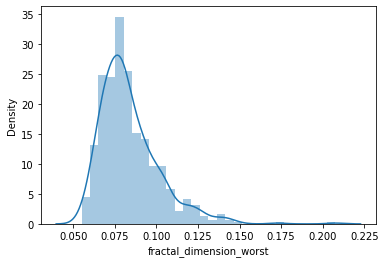

In [11]:
for i in vis:
  sns.distplot(x=df[i],bins=30,kde=True,axlabel=i)
  plt.show()

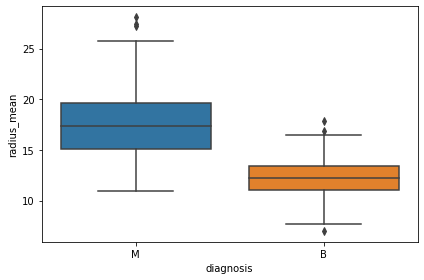

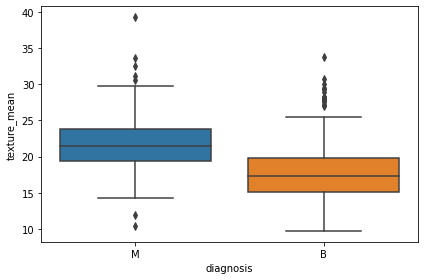

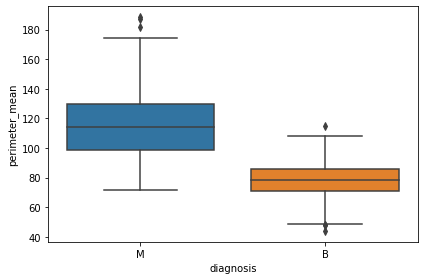

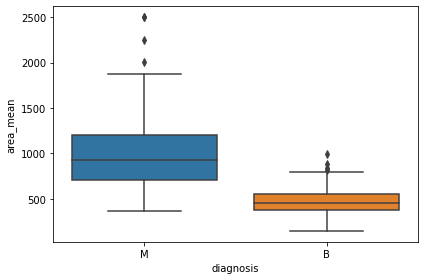

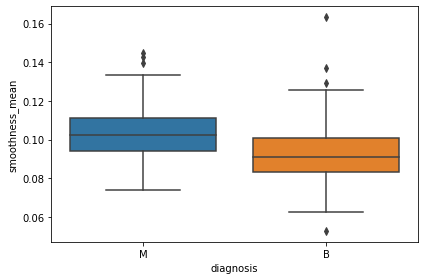

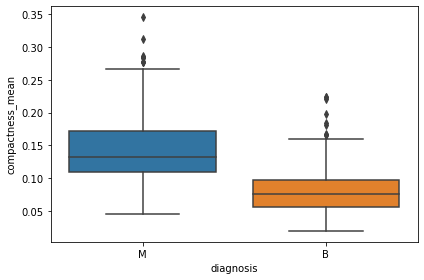

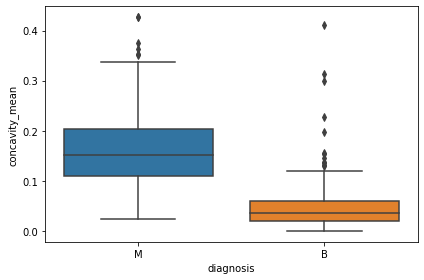

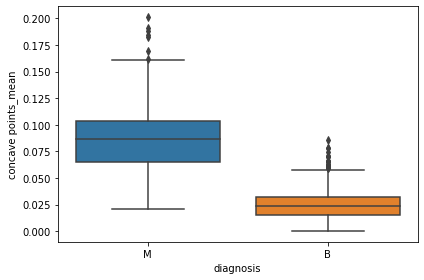

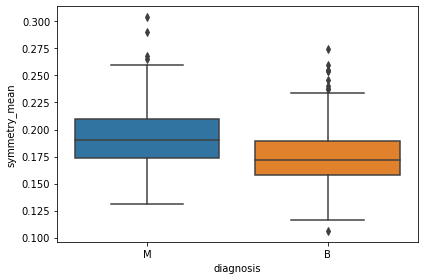

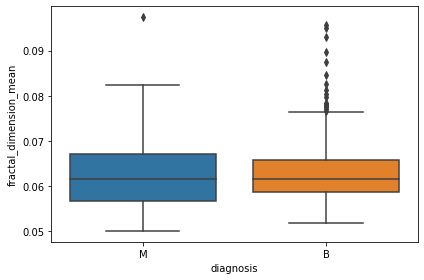

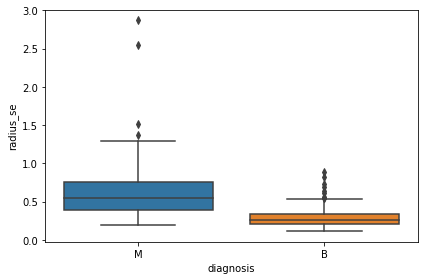

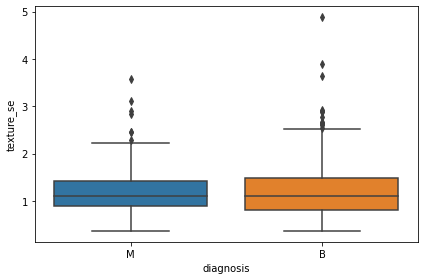

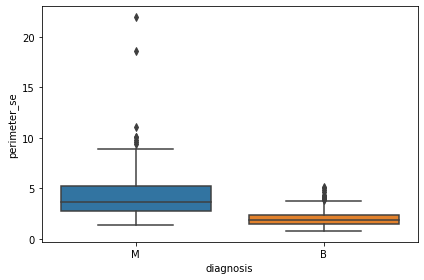

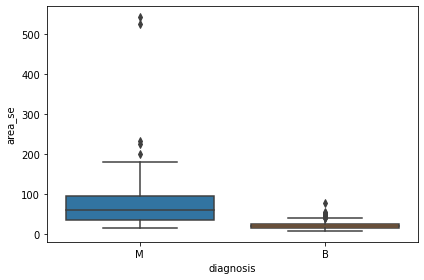

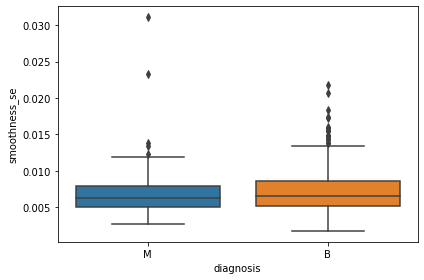

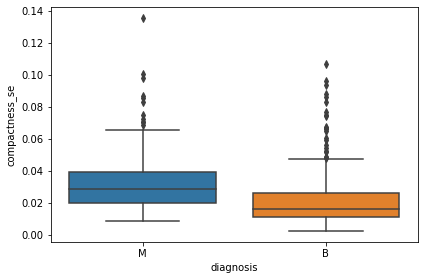

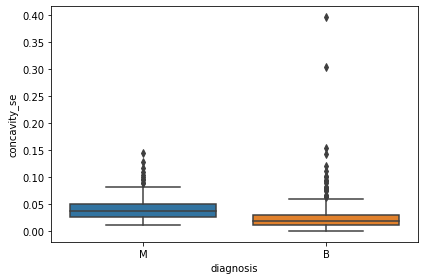

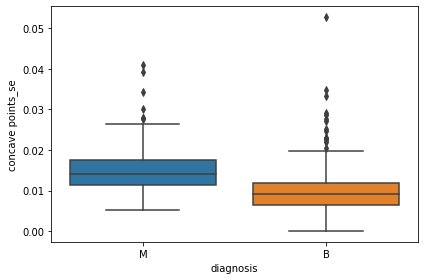

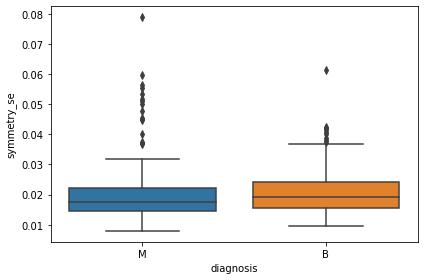

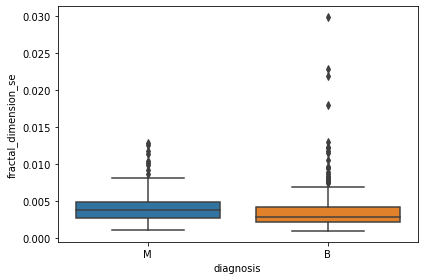

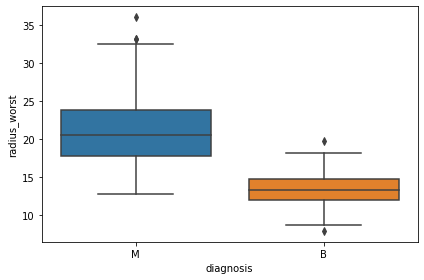

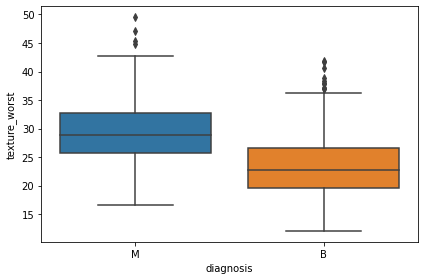

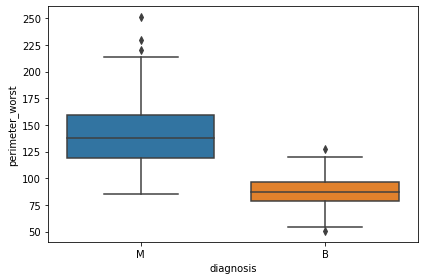

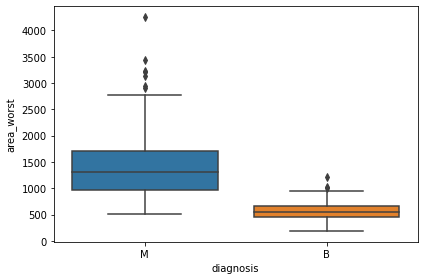

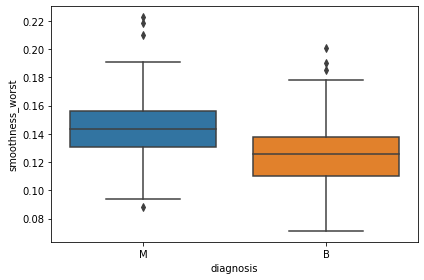

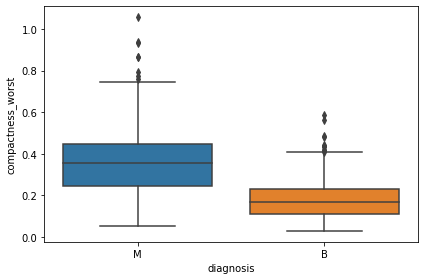

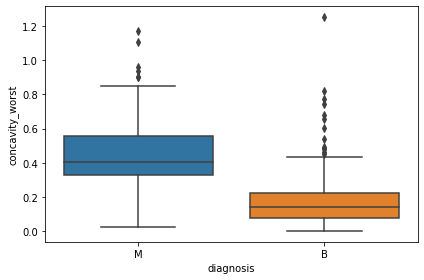

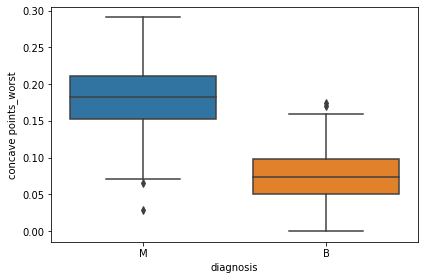

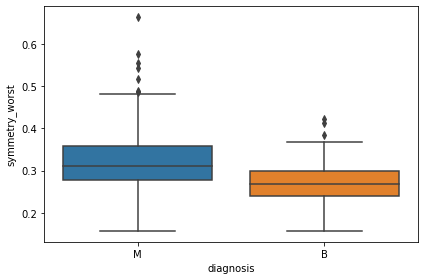

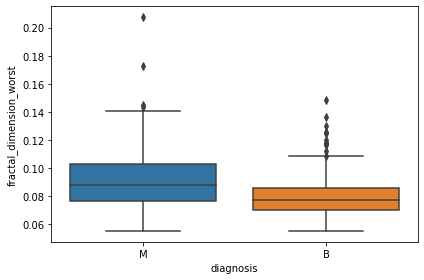

In [12]:
for i in vis:
  sns.boxplot(x='diagnosis',y=df[i],data=df)
  plt.tight_layout()
  plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

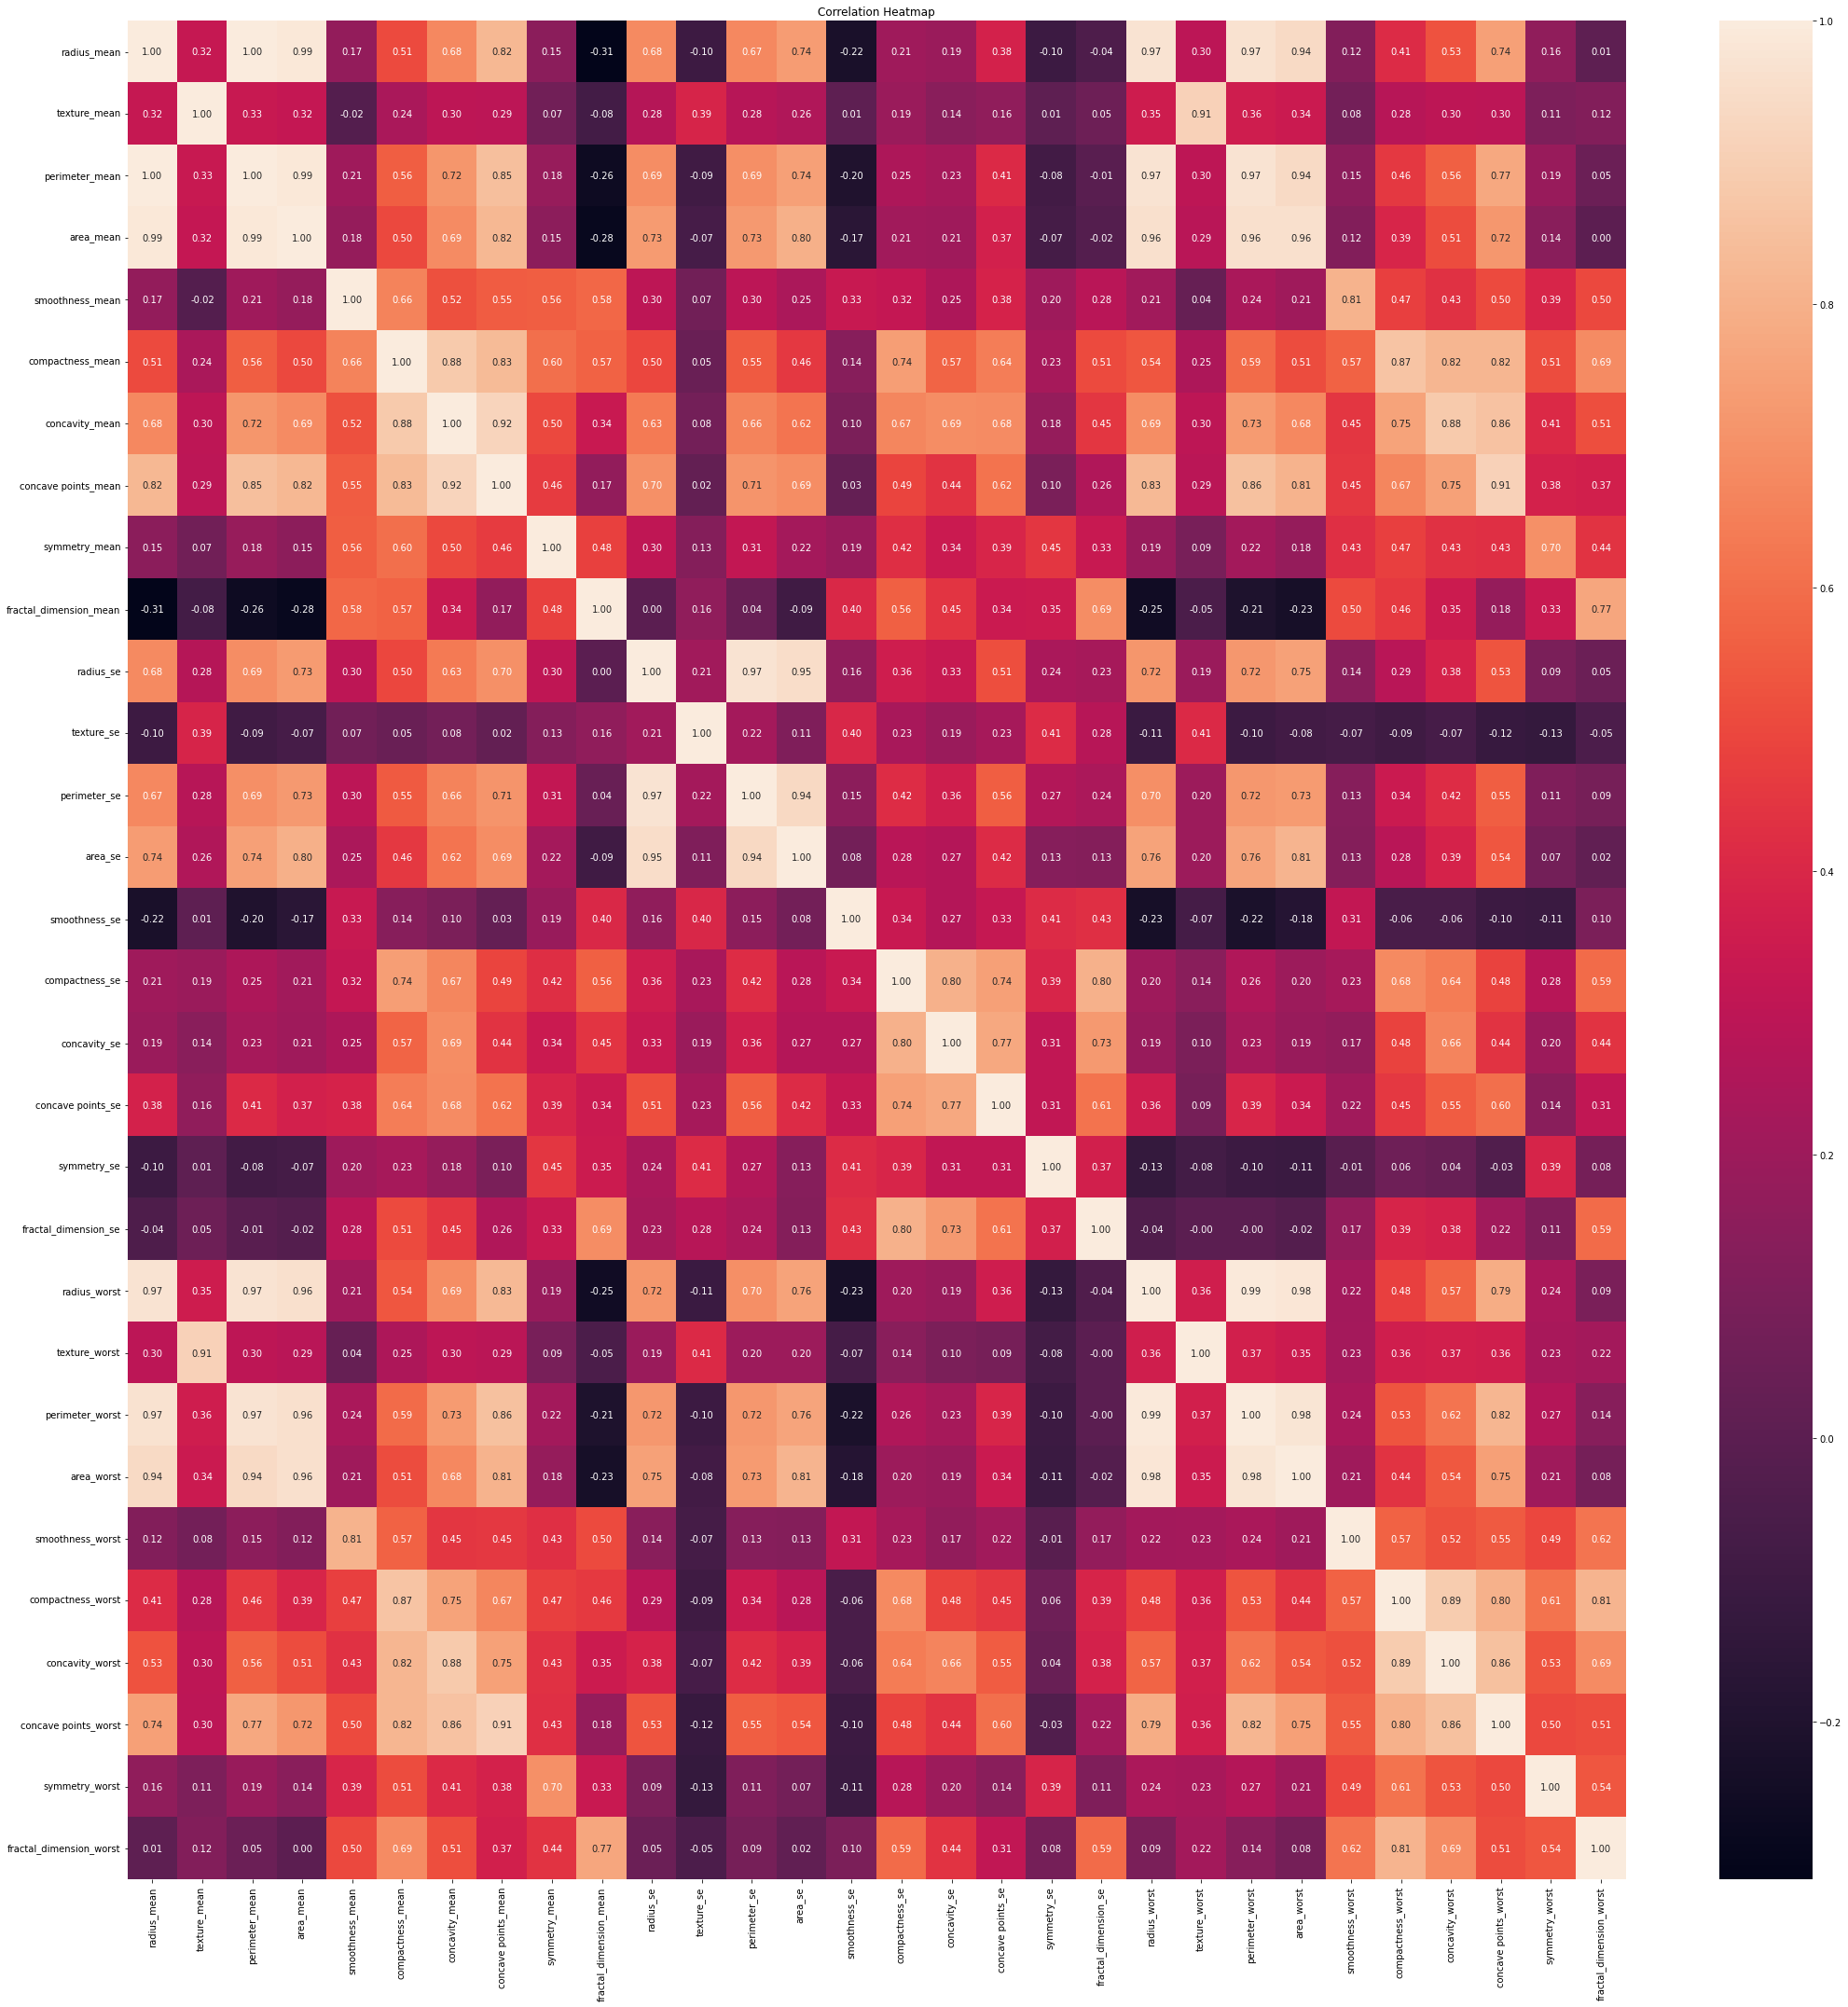

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show

**3 — Feature Scaling the Data**

As we need exact predictions from the model, we need to feature scale the data.Therefore, to feature scale the data we use the Standard Scaler class of preprocessing library from Scikit-learn.

In [14]:
for i in vis:
  df[i] = StandardScaler().fit_transform(df[i].values.reshape(-1,1))

**4 — Encoding the Categorical Data**<br>
As the Dependent (y) variable consists of strings, therefore they have to be encoded in binary format so that our model does not find any problem in classifying.To encode we use Label Encoder class from Scikit-learn library of python.

In [15]:
df.diagnosis = LabelEncoder().fit_transform(df.diagnosis)

**5 -divide the data set into Dependent (y) and Independent (X) variable.**

In [16]:
X = df.drop('diagnosis',1)
y = df.diagnosis

**6 — Splitting the Data set into Training Set and Test Set**

Now for training and testing the model we first split the data into training set and test set. For splitting the data set into train and test we use model selection library from Scikit-learn.

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=142)

**Machine Learning Model Building**

We have to build the best model to classify the cells. Therefore we have to train and test the dataset with multiple Machine Learning Algorithms and determine the best model with high accuracy.

***A. Logistic Regression Model***

In [18]:
model1 = LogisticRegression().fit(X_train,y_train)
model1

LogisticRegression()

Accuracy of Logistic Regression => 0.9824561403508771
R2 -Score of Logistic Regression => 0.9275960622419815
F1 -Score of Logistic Regression => 0.9787234042553191
Classification Report of Logistic Regression =>
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

HeatMap oF Confusion Matrix Logistic Regression


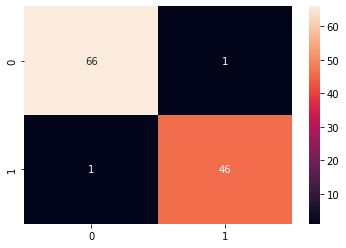

In [28]:
print('Accuracy of Logistic Regression =>',accuracy_score(y_test,model1.predict(X_test)))
print("R2 -Score of Logistic Regression =>",r2_score(y_test,model1.predict(X_test)))
print("F1 -Score of Logistic Regression =>",f1_score(y_test,model1.predict(X_test)))
print('Classification Report of Logistic Regression =>\n',(classification_report(y_test,model1.predict(X_test))))
print('HeatMap oF Confusion Matrix Logistic Regression')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

***B. DecisionTreeClassifier Model***

In [24]:
model2 = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train,y_train)
model2

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy of  Decision Tree Classifier => 0.9385964912280702
R2 -Score of Decision Tree Classifier => 0.7465862178469356
F1 -Score of Decision Tree Classifier=> 0.9278350515463918
Classification Report of Decision Tree Classifier=>
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

HeatMap oF Confusion Matrix Decision Tree Classifier


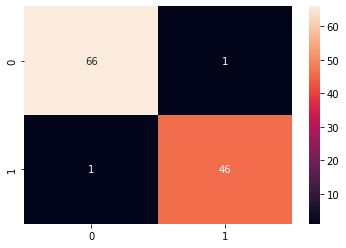

In [27]:
print('Accuracy of  Decision Tree Classifier =>',accuracy_score(y_test,model2.predict(X_test)))
print("R2 -Score of Decision Tree Classifier =>",r2_score(y_test,model2.predict(X_test)))
print("F1 -Score of Decision Tree Classifier=>",f1_score(y_test,model2.predict(X_test)))
print('Classification Report of Decision Tree Classifier=>\n',(classification_report(y_test,model2.predict(X_test))))
print('HeatMap oF Confusion Matrix Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

**C. RandomForest Regressor Model**

In [32]:
model3 = RandomForestRegressor(n_estimators=250,random_state=0).fit(X_train,y_train)
model3

RandomForestRegressor(n_estimators=250, random_state=0)

In [33]:
y_pred = model3.predict(X_test)
y_pred = np.rint(y_pred)

Accuracy of  Random Forest Regressor => 0.9824561403508771
R2 -Score of Random Forest Regressor => 0.9275960622419815
F1 -Score of Random Forest Regressor=> 0.9787234042553191
Classification Report of Random Forest Regressor=>
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

HeatMap oF Confusion Matrix Random Forest Regressor


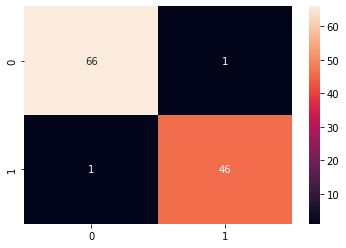

In [36]:
print('Accuracy of  Random Forest Regressor =>',accuracy_score(y_test,y_pred))
print("R2 -Score of Random Forest Regressor =>",r2_score(y_test,y_pred))
print("F1 -Score of Random Forest Regressor=>",f1_score(y_test,y_pred))
print('Classification Report of Random Forest Regressor=>\n',(classification_report(y_test,y_pred)))
print('HeatMap oF Confusion Matrix Random Forest Regressor')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

***D. RandomForest Classifier Model***

In [37]:
model4 = RandomForestClassifier(n_estimators=180,criterion='entropy',random_state=0).fit(X_train,y_train)
model4

RandomForestClassifier(criterion='entropy', n_estimators=180, random_state=0)

Accuracy of Random Forest Classifier => 0.9824561403508771
R2 -Score of Random Forest Classifier => 0.9275960622419815
F1 -Score of Random Forest Classifier=> 0.9787234042553191
Classification Report of Random Forest Classifier=>
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

HeatMap oF Confusion Matrix Random Forest Classifier


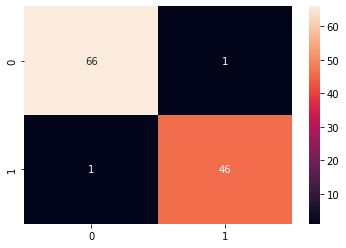

In [38]:
print('Accuracy of Random Forest Classifier =>',accuracy_score(y_test,model4.predict(X_test)))
print("R2 -Score of Random Forest Classifier =>",r2_score(y_test,model4.predict(X_test)))
print("F1 -Score of Random Forest Classifier=>",f1_score(y_test,model4.predict(X_test)))
print('Classification Report of Random Forest Classifier=>\n',(classification_report(y_test,model4.predict(X_test))))
print('HeatMap oF Confusion Matrix Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,model4.predict(X_test)),annot=True)
plt.show()

***E. KNN Model***

In [39]:
model5 = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2).fit(X_train,y_train)
model5

KNeighborsClassifier(n_neighbors=8)

Accuracy of KNeighbors Classifier => 0.9824561403508771
R2 -Score of KNeighbors Classifier => 0.9275960622419815
F1 -Score of KNeighbors Classifier=> 0.9782608695652174
Classification Report of KNeighbors Classifier=>
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

HeatMap oF Confusion Matrix KNeighbors Classifier


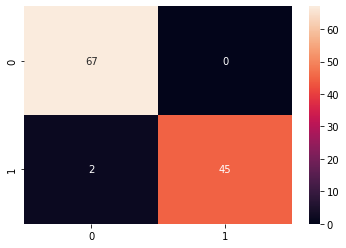

In [40]:
print('Accuracy of KNeighbors Classifier =>',accuracy_score(y_test,model5.predict(X_test)))
print("R2 -Score of KNeighbors Classifier =>",r2_score(y_test,model5.predict(X_test)))
print("F1 -Score of KNeighbors Classifier=>",f1_score(y_test,model5.predict(X_test)))
print('Classification Report of KNeighbors Classifier=>\n',(classification_report(y_test,model5.predict(X_test))))
print('HeatMap oF Confusion Matrix KNeighbors Classifier')
sns.heatmap(confusion_matrix(y_test,model5.predict(X_test)),annot=True)
plt.show()

***F. SVM Model***

In [41]:
model6 = SVC(degree=3).fit(X_train,y_train)
model6

SVC()

Accuracy of Support Vector Classification. => 0.9824561403508771
R2 -Score of Support Vector Classification. => 0.9275960622419815
F1 -Score of Support Vector Classification.=> 0.9787234042553191
Classification Report of Support Vector Classification.=>
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

HeatMap oF Confusion Matrix Support Vector Classification.


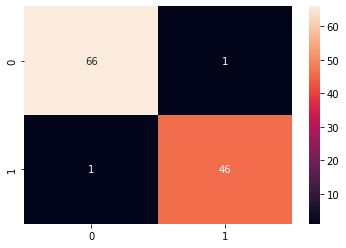

In [42]:
print('Accuracy of Support Vector Classification. =>',accuracy_score(y_test,model6.predict(X_test)))
print("R2 -Score of Support Vector Classification. =>",r2_score(y_test,model6.predict(X_test)))
print("F1 -Score of Support Vector Classification.=>",f1_score(y_test,model6.predict(X_test)))
print('Classification Report of Support Vector Classification.=>\n',(classification_report(y_test,model6.predict(X_test))))
print('HeatMap oF Confusion Matrix Support Vector Classification.')
sns.heatmap(confusion_matrix(y_test,model6.predict(X_test)),annot=True)
plt.show()

**Saving and Loading the Model**

After completion of the Machine Learning project, the ML model need to deploy in an application. To deploy the ML model , we need to save it first. To save the Machine Learning project we can use the pickle package.Here I have used pickle package of python to load and save the model.The pickle or joblib package saves the model to that address, later on to deploy the model we can simply load the model through the pickle file.

In [43]:
pickle.dump(model4,open('Breast_Cancer_Prediction.pickle','wb'))
Breast_Cancer_Prediction_model = pickle.load(open('Breast_Cancer_Prediction.pickle','rb'))

In [46]:
Breast_Cancer_Prediction_model.predict(X[0:50])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

**Conclusion:**

After training all the algorithms , we found that Random Forest Regression, KNN, Decision Tree Classification , Random Forest Classification Model have high accuracy. From them we choose the Random Forest Classification Model as it gives the highest accuracy.

I hope you understood this Machine Learning Project and enjoyed it.I hope my efforts will be valuable for saving the life of Breast Cancer Patients.I hope more improvised model comes up with more accuracy and help us to tackle this problem.